In [1]:
import pycaret
import pandas as pd

In [2]:
pycaret.__version__

'3.1.0'

In [3]:
df = pd.read_csv("./weatherAUS.csv")

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df = df[df["RainTomorrow"].notna()]

In [8]:
data = df

In [9]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = "RainTomorrow", session_id = 123)

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 68)"
6,Transformed train set shape,"(99535, 68)"
7,Transformed test set shape,"(42658, 68)"
8,Ordinal features,1
9,Numeric features,16


In [10]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [11]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [12]:
exp.setup(data, target = "RainTomorrow", session_id = 123)

,Description,Value
0,Session id,123
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 68)"
6,Transformed train set shape,"(99535, 68)"
7,Transformed test set shape,"(42658, 68)"
8,Ordinal features,1
9,Numeric features,16


In [13]:
best = compare_models()

In [15]:
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

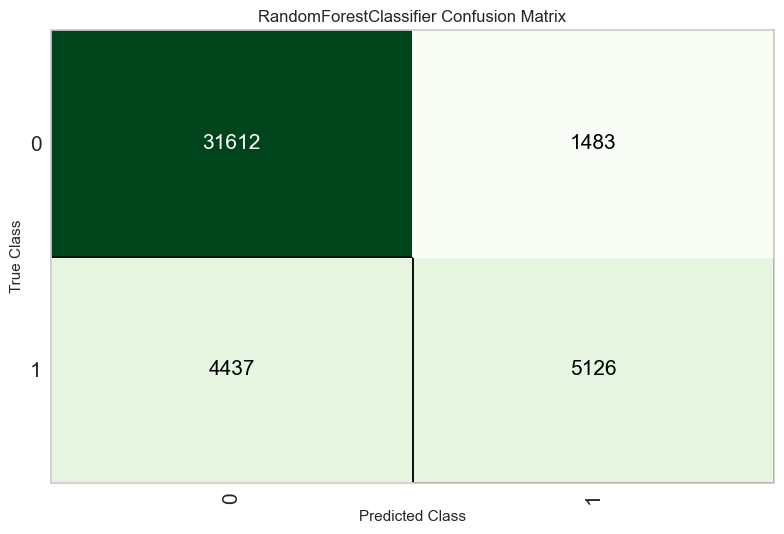

In [16]:
plot_model(best, plot = 'confusion_matrix')

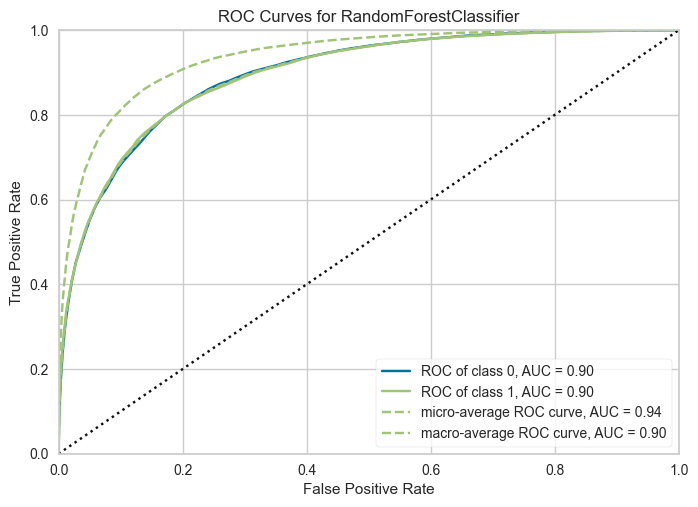

In [17]:
plot_model(best, plot = 'auc')

In [18]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8612,0.8952,0.8612,0.8542,0.8515,0.5518,0.5662


In [19]:
holdout_pred.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,prediction_label,prediction_score
4864,2014-03-29,BadgerysCreek,17.9,26.9,1.6,NaN,NaN,SSW,24.0,WSW,ESE,9.0,7.0,84.0,55.0,1015.500000,1014.299988,NaN,NaN,20.799999,26.200001,Yes,0,No,0.57
57658,2016-02-28,Ballarat,12.3,24.0,0.0,NaN,NaN,S,43.0,S,S,26.0,22.0,72.0,36.0,1020.700012,1019.400024,8.0,NaN,14.600000,22.900000,No,0,No,0.99
49195,2009-05-22,Tuggeranong,9.7,15.5,1.4,NaN,NaN,SE,39.0,SE,SE,20.0,19.0,78.0,68.0,1026.900024,1024.300049,NaN,NaN,12.600000,14.300000,Yes,0,No,0.62
51197,2015-02-12,Tuggeranong,17.5,25.5,0.8,NaN,NaN,E,35.0,WSW,ESE,7.0,17.0,74.0,54.0,1021.400024,1020.200012,NaN,NaN,19.700001,24.700001,No,0,No,0.69
109378,2011-02-16,Albany,20.0,22.4,0.0,6.4,4.1,NaN,NaN,NaN,NaN,19.0,39.0,86.0,73.0,1015.799988,1015.500000,6.0,6.0,20.500000,21.000000,No,0,No,0.62
